# Monitorando as águas

## Filtrando linhas

### Selecionando linhas com paramatros desejados e convertendo tipos

In [387]:
import pandas as pd

In [388]:
dados_3anos = pd.read_excel('RelatorioQualidadeAguasSuperficiais_3anos.xlsx')

In [389]:
dados_3anos = dados_3anos[['Data Coleta', 'Parametro', 'Valor', 'Unidade' ]]

In [390]:
dados_3anos

,Data Coleta,Parametro,Valor,Unidade
0,03/01/2019,pH,"7,58000000",U.pH
1,13/03/2019,pH,"7,54000000",U.pH
2,25/04/2019,pH,"7,50000000",U.pH
3,16/05/2019,pH,"7,56000000",U.pH
4,06/06/2019,pH,"7,58000000",U.pH
...,...,...,...,...
846,12/11/2019,Carbono Orgânico Total,"28,20000000",mg/L
847,05/12/2019,Carbono Orgânico Total,"34,30000000",mg/L
848,04/03/2020,Carbono Orgânico Total,"15,60000000",mg/L
849,03/01/2019,Nitrogênio Total,"24,80000000",mg/L


In [391]:
dados_3anos['Data Coleta'] = pd.to_datetime(dados_3anos['Data Coleta'], format='%d/%m/%Y',  errors='coerce')

In [392]:
dados_3anos['Data Coleta'] = dados_3anos['Data Coleta'].apply(lambda x: x.strftime('%Y-%m'))

In [393]:
dados_3anos['Data Coleta'] = pd.to_datetime(dados_3anos['Data Coleta'], format='%Y-%m',  errors='coerce')

In [394]:
dados_3anos["Valor"] = dados_3anos["Valor"].str.replace(',','.')

In [395]:
dados_3anos["Valor"] = pd.to_numeric(dados_3anos["Valor"],errors='coerce')

In [396]:
dados_3anos.head()

,Data Coleta,Parametro,Valor,Unidade
0,2019-01-01,pH,7.58,U.pH
1,2019-03-01,pH,7.54,U.pH
2,2019-04-01,pH,7.50,U.pH
3,2019-05-01,pH,7.56,U.pH
4,2019-06-01,pH,7.58,U.pH


### Separando em dfs (opcional) e selecionando colunas desejadas

In [397]:
df_pH = dados_3anos.loc[(dados_3anos['Parametro'] == 'pH')]
df_pH.rename(columns={'Valor':'Valor pH(U.pH)'}, inplace=True)

df_temp = dados_3anos.loc[(dados_3anos['Parametro'] == 'Temperatura da Água')]
df_temp.rename(columns={'Valor':'Valor temperatura(ºC)'}, inplace=True)

df_ar = dados_3anos.loc[(dados_3anos['Parametro'] == 'Temperatura do Ar')]
df_ar.rename(columns={'Valor':'Valor temperatura ar(ºC)'}, inplace=True)

df_fosf = dados_3anos.loc[(dados_3anos['Parametro'] == 'Fósforo Total')]
df_fosf.rename(columns={'Valor':'Valor fosforo(mg/L)'}, inplace=True)

df_dbo = dados_3anos.loc[(dados_3anos['Parametro'] == 'DBO (5, 20)')]
df_dbo.rename(columns={'Valor':'Valor DBO(mg/L)'}, inplace=True)

df_nit = dados_3anos.loc[(dados_3anos['Parametro'] == 'Nitrogênio Kjeldahl') | (dados_3anos['Parametro'] == 'Nitrogênio-Nitrito') 
            | (dados_3anos['Parametro'] == 'Nitrogênio-Nitrato')]
df_nit.rename(columns={'Valor':'Valor nitrogenio(mg/L)'}, inplace=True)

df_coli = dados_3anos.loc[(dados_3anos['Parametro'] == 'Escherichia coli**')]
df_coli.rename(columns={'Valor':'Valor coliforme(UFC/100mL)'}, inplace=True)

df_oxi = dados_3anos.loc[(dados_3anos['Parametro'] == 'Oxigênio Dissolvido')]
df_oxi.rename(columns={'Valor':'Valor oxigenio(mg/L)'}, inplace=True)

df_turb = dados_3anos.loc[(dados_3anos['Parametro'] == 'Turbidez')]
df_turb.rename(columns={'Valor':'Valor turbidez(UNT)'}, inplace=True)

df_sol = dados_3anos.loc[(dados_3anos['Parametro'] == 'Sólido Total')]
df_sol.rename(columns={'Valor':'Valor solidos(mg/L)'}, inplace=True)


c:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\frame.py:5042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [398]:
print(
df_pH.shape[0],
df_temp.shape[0],
df_ar.shape[0],
df_fosf.shape[0],
df_dbo.shape[0],
df_nit.shape[0],
df_coli.shape[0],
df_oxi.shape[0],
df_turb.shape[0],
df_sol.shape[0])

21 21 21 21 14 61 21 21 21 21


In [399]:
dfs = [
        df_pH,
        df_temp,
        df_ar,
        df_fosf,
        df_dbo,
        df_nit,
        df_coli,
        df_oxi,
        df_turb,
        df_sol]

In [400]:
for df in dfs:
   df.drop(['Parametro','Unidade'], inplace=True, axis=1)

c:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Somando os valores de nitrogênio

In [401]:
df_nit.head(20)

,Data Coleta,Valor nitrogenio(mg/L)
283,2019-04-01,21.80
284,2019-05-01,23.80
285,2019-06-01,22.10
286,2019-07-01,4.28
287,2019-08-01,23.00
288,2019-09-01,18.50
289,2021-05-01,27.80
290,2021-08-01,27.50
291,2021-11-01,16.60
292,2020-07-01,21.90


In [402]:
#df_periodo = df_periodo.reset_index()
#df_periodo['Data Coleta'] = df_periodo['Data Coleta'].apply(lambda x: x.strftime('%Y-%m'))
#df_periodo.set_index('Data Coleta', inplace=True)

#df_cron['Valor pH(U.pH)'].dtypes

In [403]:
df_nit = df_nit.groupby(pd.Grouper(key='Data Coleta', axis=0, 
                      freq='M')).sum()
df_nit = df_nit.reset_index()

In [404]:
df_nit

,Data Coleta,Valor nitrogenio(mg/L)
0,2019-01-31,0.30
1,2019-02-28,0.00
2,2019-03-31,2.08
3,2019-04-30,22.10
4,2019-05-31,24.71
5,2019-06-30,22.50
6,2019-07-31,5.49
7,2019-08-31,23.30
8,2019-09-30,19.06
9,2019-10-31,21.36


In [405]:
df_nit.shape[0]

35

In [406]:
df_nit= df_nit[df_nit['Valor nitrogenio(mg/L)'] != 0]

In [407]:
print(df_nit.shape[0])
df_nit.head()

21


,Data Coleta,Valor nitrogenio(mg/L)
0,2019-01-31,0.30
2,2019-03-31,2.08
3,2019-04-30,22.10
4,2019-05-31,24.71
5,2019-06-30,22.50


In [408]:
dfs = [
        df_pH,
        df_temp,
        df_ar,
        df_fosf,
        df_dbo,
        df_nit,
        df_coli,
        df_oxi,
        df_turb,
        df_sol]

In [409]:
for df in dfs:
    df['Data Coleta'] = df['Data Coleta'].apply(lambda x: x.strftime('%Y-%m'))

c:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [410]:
print(
df_pH.shape[0],
df_temp.shape[0],
df_ar.shape[0],
df_fosf.shape[0],
df_dbo.shape[0],
df_nit.shape[0],
df_coli.shape[0],
df_oxi.shape[0],
df_turb.shape[0],
df_sol.shape[0])

21 21 21 21 14 21 21 21 21 21


### Juntando os dfs

In [411]:
from functools import reduce

In [412]:
df_juntos = reduce(lambda  left,right: pd.merge(left,right,on=['Data Coleta'],
                                            how='outer'), dfs)

In [413]:
df_juntos.head(20)

,Data Coleta,Valor pH(U.pH),Valor temperatura(ºC),Valor temperatura ar(ºC),Valor fosforo(mg/L),Valor DBO(mg/L),Valor nitrogenio(mg/L),Valor coliforme(UFC/100mL),Valor oxigenio(mg/L),Valor turbidez(UNT),Valor solidos(mg/L)
0,2019-01,7.58,27.0,28.5,2.54,45.0,0.30,5200000.0,0.59,48.3,310.0
1,2019-03,7.54,24.9,27.6,1.26,15.0,2.08,1800000.0,3.29,17.7,258.0
2,2019-04,7.50,25.8,28.7,2.31,33.0,22.10,2900000.0,1.16,54.5,356.0
3,2019-05,7.56,22.0,19.6,1.87,50.0,24.71,3500000.0,3.63,62.2,610.0
4,2019-06,7.58,20.5,25.1,2.03,31.0,22.50,2600000.0,2.30,30.0,304.0
5,2019-07,7.43,18.2,19.3,0.72,34.0,5.49,600000.0,8.03,83.7,192.0
6,2021-05,7.50,20.8,21.9,3.00,NaN,28.35,3400000.0,1.60,43.1,290.0
7,2021-08,7.60,18.1,20.8,2.80,NaN,27.80,1900000.0,3.52,45.0,260.0
8,2021-11,7.60,22.6,24.3,1.74,NaN,17.18,2100000.0,1.37,60.0,250.0
9,2020-01,7.60,25.6,31.8,1.30,31.1,20.73,9400000.0,3.94,18.7,270.0


----------

## Organizando em ordem cronológica e convertendo tipos

### Convertendo data

In [414]:
df_juntos['Data Coleta'].dtypes

dtype('O')

In [415]:
df_juntos['Data Coleta'] = pd.to_datetime(df_juntos['Data Coleta'], format='%Y-%m',  errors='coerce')

In [416]:
df_juntos.head()

,Data Coleta,Valor pH(U.pH),Valor temperatura(ºC),Valor temperatura ar(ºC),Valor fosforo(mg/L),Valor DBO(mg/L),Valor nitrogenio(mg/L),Valor coliforme(UFC/100mL),Valor oxigenio(mg/L),Valor turbidez(UNT),Valor solidos(mg/L)
0,2019-01-01,7.58,27.0,28.5,2.54,45.0,0.30,5200000.0,0.59,48.3,310.0
1,2019-03-01,7.54,24.9,27.6,1.26,15.0,2.08,1800000.0,3.29,17.7,258.0
2,2019-04-01,7.50,25.8,28.7,2.31,33.0,22.10,2900000.0,1.16,54.5,356.0
3,2019-05-01,7.56,22.0,19.6,1.87,50.0,24.71,3500000.0,3.63,62.2,610.0
4,2019-06-01,7.58,20.5,25.1,2.03,31.0,22.50,2600000.0,2.30,30.0,304.0


In [417]:
df_juntos['Data Coleta'].dtypes

dtype('<M8[ns]')

### Orem cronológica

In [418]:
df_cron = df_juntos.sort_values(by='Data Coleta')

In [419]:
df_cron.head(21)

,Data Coleta,Valor pH(U.pH),Valor temperatura(ºC),Valor temperatura ar(ºC),Valor fosforo(mg/L),Valor DBO(mg/L),Valor nitrogenio(mg/L),Valor coliforme(UFC/100mL),Valor oxigenio(mg/L),Valor turbidez(UNT),Valor solidos(mg/L)
0,2019-01-01,7.58,27.0,28.5,2.54,45.0,0.30,5200000.0,0.59,48.3,310.0
1,2019-03-01,7.54,24.9,27.6,1.26,15.0,2.08,1800000.0,3.29,17.7,258.0
2,2019-04-01,7.50,25.8,28.7,2.31,33.0,22.10,2900000.0,1.16,54.5,356.0
3,2019-05-01,7.56,22.0,19.6,1.87,50.0,24.71,3500000.0,3.63,62.2,610.0
4,2019-06-01,7.58,20.5,25.1,2.03,31.0,22.50,2600000.0,2.30,30.0,304.0
5,2019-07-01,7.43,18.2,19.3,0.72,34.0,5.49,600000.0,8.03,83.7,192.0
15,2019-08-01,7.44,19.5,19.2,2.71,52.0,23.30,2100000.0,1.30,52.1,310.0
16,2019-09-01,7.51,20.3,19.2,2.17,70.0,19.06,3500000.0,2.65,64.7,468.0
17,2019-10-01,7.40,22.2,26.9,2.79,48.0,21.36,2800000.0,2.61,52.2,284.0
18,2019-11-01,7.50,23.2,22.5,2.68,42.2,27.40,4500000.0,2.06,29.2,258.0


### Convertendo valores

In [420]:
lista_col = df_cron.columns.values.tolist()[1:]

In [421]:
lista_col

['Valor pH(U.pH)',
 'Valor temperatura(ºC)',
 'Valor temperatura ar(ºC)',
 'Valor fosforo(mg/L)',
 'Valor DBO(mg/L)',
 'Valor nitrogenio(mg/L)',
 'Valor coliforme(UFC/100mL)',
 'Valor oxigenio(mg/L)',
 'Valor turbidez(UNT)',
 'Valor solidos(mg/L)']

In [422]:
df_cron['Valor pH(U.pH)'].dtypes

dtype('float64')

Passando para uma planilha do excel

In [423]:
#df_cron.to_excel(r'dados_filtrados.xlsx', index = False)

### Período de análise

Como não é possível calcular o IQA nos mesese em que alguns parâmetros não possuem valor,
vamos cortar essas linhas

In [424]:
df_cron.dropna(inplace=True)

In [425]:
df_cron

,Data Coleta,Valor pH(U.pH),Valor temperatura(ºC),Valor temperatura ar(ºC),Valor fosforo(mg/L),Valor DBO(mg/L),Valor nitrogenio(mg/L),Valor coliforme(UFC/100mL),Valor oxigenio(mg/L),Valor turbidez(UNT),Valor solidos(mg/L)
0,2019-01-01,7.58,27.0,28.5,2.54,45.0,0.30,5200000.0,0.59,48.3,310.0
1,2019-03-01,7.54,24.9,27.6,1.26,15.0,2.08,1800000.0,3.29,17.7,258.0
2,2019-04-01,7.50,25.8,28.7,2.31,33.0,22.10,2900000.0,1.16,54.5,356.0
3,2019-05-01,7.56,22.0,19.6,1.87,50.0,24.71,3500000.0,3.63,62.2,610.0
4,2019-06-01,7.58,20.5,25.1,2.03,31.0,22.50,2600000.0,2.30,30.0,304.0
5,2019-07-01,7.43,18.2,19.3,0.72,34.0,5.49,600000.0,8.03,83.7,192.0
15,2019-08-01,7.44,19.5,19.2,2.71,52.0,23.30,2100000.0,1.30,52.1,310.0
16,2019-09-01,7.51,20.3,19.2,2.17,70.0,19.06,3500000.0,2.65,64.7,468.0
17,2019-10-01,7.40,22.2,26.9,2.79,48.0,21.36,2800000.0,2.61,52.2,284.0
18,2019-11-01,7.50,23.2,22.5,2.68,42.2,27.40,4500000.0,2.06,29.2,258.0


#### Logo, começando de mar/2019 vamos calcular até mar/2020

In [426]:
df_periodo = df_cron.iloc[1: , :]

In [427]:
df_periodo

,Data Coleta,Valor pH(U.pH),Valor temperatura(ºC),Valor temperatura ar(ºC),Valor fosforo(mg/L),Valor DBO(mg/L),Valor nitrogenio(mg/L),Valor coliforme(UFC/100mL),Valor oxigenio(mg/L),Valor turbidez(UNT),Valor solidos(mg/L)
1,2019-03-01,7.54,24.9,27.6,1.26,15.0,2.08,1800000.0,3.29,17.7,258.0
2,2019-04-01,7.50,25.8,28.7,2.31,33.0,22.10,2900000.0,1.16,54.5,356.0
3,2019-05-01,7.56,22.0,19.6,1.87,50.0,24.71,3500000.0,3.63,62.2,610.0
4,2019-06-01,7.58,20.5,25.1,2.03,31.0,22.50,2600000.0,2.30,30.0,304.0
5,2019-07-01,7.43,18.2,19.3,0.72,34.0,5.49,600000.0,8.03,83.7,192.0
15,2019-08-01,7.44,19.5,19.2,2.71,52.0,23.30,2100000.0,1.30,52.1,310.0
16,2019-09-01,7.51,20.3,19.2,2.17,70.0,19.06,3500000.0,2.65,64.7,468.0
17,2019-10-01,7.40,22.2,26.9,2.79,48.0,21.36,2800000.0,2.61,52.2,284.0
18,2019-11-01,7.50,23.2,22.5,2.68,42.2,27.40,4500000.0,2.06,29.2,258.0
19,2019-12-01,7.20,24.4,28.0,2.49,61.9,25.00,3800000.0,1.16,56.3,308.0


Retirando os dias

In [428]:
df_periodo['Data Coleta'] = df_periodo['Data Coleta'].apply(lambda x: x.strftime('%Y-%m'))
df_periodo.set_index('Data Coleta', inplace=True)

c:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [429]:
df_periodo

,Valor pH(U.pH),Valor temperatura(ºC),Valor temperatura ar(ºC),Valor fosforo(mg/L),Valor DBO(mg/L),Valor nitrogenio(mg/L),Valor coliforme(UFC/100mL),Valor oxigenio(mg/L),Valor turbidez(UNT),Valor solidos(mg/L)
Data Coleta,,,,,,,,,,
2019-03,7.54,24.9,27.6,1.26,15.0,2.08,1800000.0,3.29,17.7,258.0
2019-04,7.50,25.8,28.7,2.31,33.0,22.10,2900000.0,1.16,54.5,356.0
2019-05,7.56,22.0,19.6,1.87,50.0,24.71,3500000.0,3.63,62.2,610.0
2019-06,7.58,20.5,25.1,2.03,31.0,22.50,2600000.0,2.30,30.0,304.0
2019-07,7.43,18.2,19.3,0.72,34.0,5.49,600000.0,8.03,83.7,192.0
2019-08,7.44,19.5,19.2,2.71,52.0,23.30,2100000.0,1.30,52.1,310.0
2019-09,7.51,20.3,19.2,2.17,70.0,19.06,3500000.0,2.65,64.7,468.0
2019-10,7.40,22.2,26.9,2.79,48.0,21.36,2800000.0,2.61,52.2,284.0
2019-11,7.50,23.2,22.5,2.68,42.2,27.40,4500000.0,2.06,29.2,258.0


## Plotando gráficos

In [430]:
import matplotlib.pyplot as plt

Antes de começar, o oxigênio dissolvido precisa estar em **% de saturação** e a temperatura refere-se ao afastamento. 

Vamos criar as colunas para tanto.

(valores de o2 calculados em https://www.waterontheweb.org/under/waterquality/dosatcalc.html)

In [431]:
df_periodo.insert(7, "O2 saturacao(%)", [39.75, 14.25, 41.51, 25.54, 85.13, 14.15, 29.31, 29.96, 24.1, 13.88, 48.22, 40.12, 32.51])

In [433]:
df_periodo['Temp afastamento(ºC)'] = df_periodo['Valor temperatura ar(ºC)'] - df_periodo['Valor temperatura(ºC)']

c:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [435]:
df_periodo

,Valor pH(U.pH),Valor temperatura(ºC),Valor temperatura ar(ºC),Valor fosforo(mg/L),Valor DBO(mg/L),Valor nitrogenio(mg/L),Valor coliforme(UFC/100mL),O2 saturacao(%),Valor oxigenio(mg/L),Valor turbidez(UNT),Valor solidos(mg/L),Temp afastamento(ºC)
Data Coleta,,,,,,,,,,,,
2019-03,7.54,24.9,27.6,1.26,15.0,2.08,1800000.0,39.75,3.29,17.7,258.0,2.7
2019-04,7.50,25.8,28.7,2.31,33.0,22.10,2900000.0,14.25,1.16,54.5,356.0,2.9
2019-05,7.56,22.0,19.6,1.87,50.0,24.71,3500000.0,41.51,3.63,62.2,610.0,-2.4
2019-06,7.58,20.5,25.1,2.03,31.0,22.50,2600000.0,25.54,2.30,30.0,304.0,4.6
2019-07,7.43,18.2,19.3,0.72,34.0,5.49,600000.0,85.13,8.03,83.7,192.0,1.1
2019-08,7.44,19.5,19.2,2.71,52.0,23.30,2100000.0,14.15,1.30,52.1,310.0,-0.3
2019-09,7.51,20.3,19.2,2.17,70.0,19.06,3500000.0,29.31,2.65,64.7,468.0,-1.1
2019-10,7.40,22.2,26.9,2.79,48.0,21.36,2800000.0,29.96,2.61,52.2,284.0,4.7
2019-11,7.50,23.2,22.5,2.68,42.2,27.40,4500000.0,24.10,2.06,29.2,258.0,-0.7


### Fósforo total

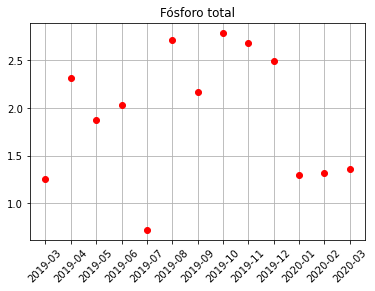

In [436]:
plt.plot_date(df_periodo.index, df_periodo["Valor fosforo(mg/L)"], c = 'red')
plt.title("Fósforo total")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### pH

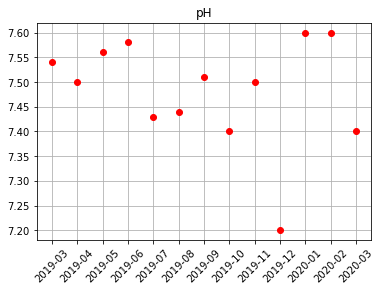

In [437]:
plt.plot_date(df_periodo.index, df_periodo["Valor pH(U.pH)"], c = 'red')
plt.title("pH")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### DBO

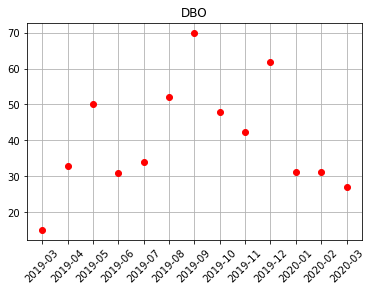

In [438]:
plt.plot_date(df_periodo.index, df_periodo["Valor DBO(mg/L)"], c = 'red')
plt.title("DBO")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Nitrogênio total

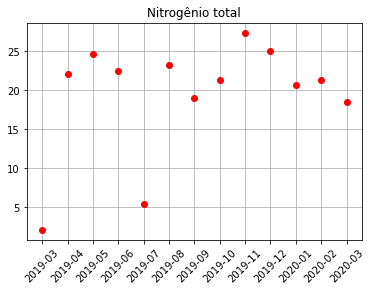

In [439]:
plt.plot_date(df_periodo.index, df_periodo["Valor nitrogenio(mg/L)"], c = 'red')
plt.title("Nitrogênio total")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Coliformes fecais

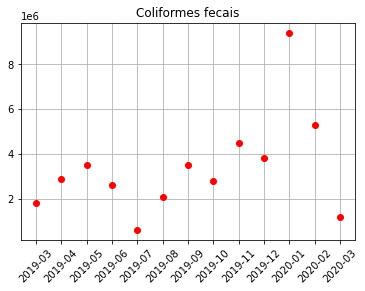

In [440]:
plt.plot_date(df_periodo.index, df_periodo["Valor coliforme(UFC/100mL)"], c = 'red')
plt.title("Coliformes fecais")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Temperatura

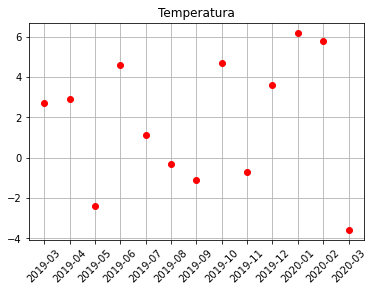

In [441]:
plt.plot_date(df_periodo.index, df_periodo["Temp afastamento(ºC)"], c = 'red')
plt.title("Temperatura")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Turbidez

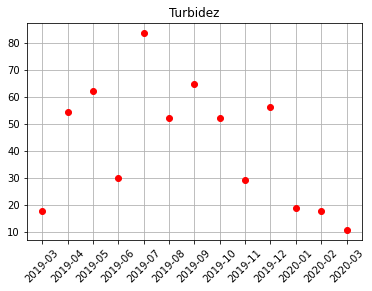

In [442]:
plt.plot_date(df_periodo.index, df_periodo["Valor turbidez(UNT)"], c = 'red')
plt.title("Turbidez")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Resíduo Total

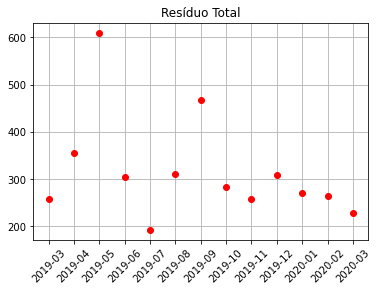

In [443]:
plt.plot_date(df_periodo.index, df_periodo["Valor solidos(mg/L)"], c = 'red')
plt.title("Resíduo Total")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Oxigênio Dissolvido

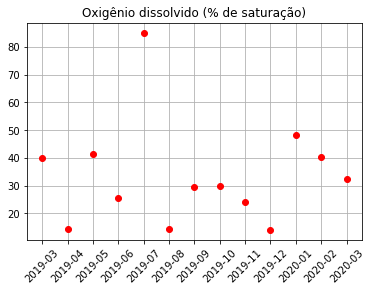

In [446]:
plt.plot_date(df_periodo.index, df_periodo["O2 saturacao(%)"], c = 'red')
plt.title("Oxigênio dissolvido (% de saturação)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()